
# Summary description analysis

## for capomulin regimen is highest =230 but the tumor volume mean is the lowest (40) among other regimens

## there is negative correlation relationship between time point and tumor volume  of capomulin regimen 

## the correlation of weights and tumor volume is positive for capomulin regimen

### thank you

In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata_df, study_results_df,
                                 how='outer', on='Mouse ID')
combined_mouse_df.head(100)




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [2]:
drugregimen_group = combined_mouse_df.groupby('Drug Regimen')


tumor_volume_mean = combined_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_volume_median =  combined_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_volume_var =  combined_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_volume_std =  combined_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_volume_sem =  combined_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']


summary_table = pd.DataFrame({"tumorvolume mean": tumor_volume_mean,
                              "tumorvolume median": tumor_volume_median,
                              "tumorvolume variance": tumor_volume_var,
                              "tumorvolume st dev.": tumor_volume_std,
                              "tumor_volume_sem": tumor_volume_sem})


summary_table

,tumorvolume mean,tumorvolume median,tumorvolume variance,tumorvolume st dev.,tumor_volume_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
drugregimen_group['Tumor Volume (mm3)'].agg(np.mean)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

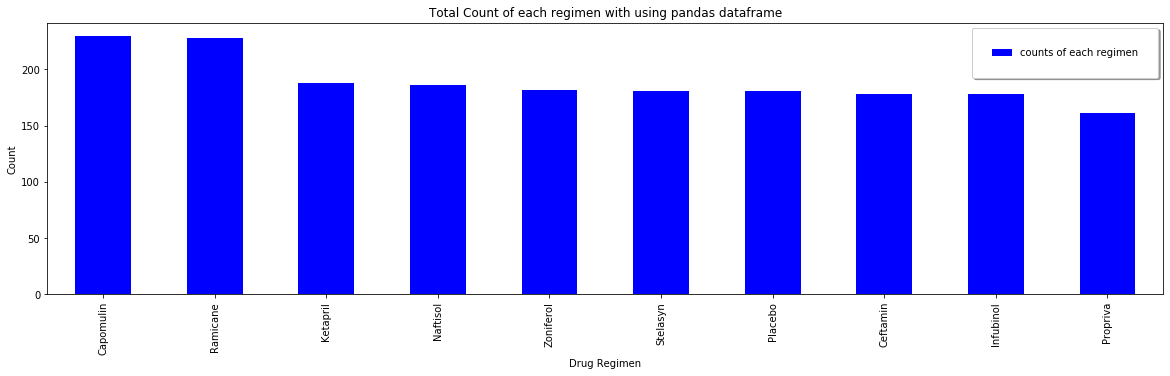

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,161


<Figure size 432x288 with 0 Axes>

In [4]:
rain_df = combined_mouse_df['Drug Regimen'].value_counts()

multi_plot = rain_df.plot(kind="bar", figsize=(20,5) ,color="blue", label="drug regimen count")

#PandasPlot.set_xticklabels() can be used to set the tick labels as well
#multi_plot.set_xticklabels( , rotation=45)

Gender = [ 'counts of each regimen']
plt.legend(Gender, loc="best",fancybox=True, framealpha=1, shadow=True, borderpad=2, ncol=2)
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Total Count of each regimen with using pandas dataframe")
plt.show() 
plt.tight_layout()

summary_table3 = pd.DataFrame(rain_df)
summary_table3

Text(0.5, 1.0, 'Total Count Via PyPlot')

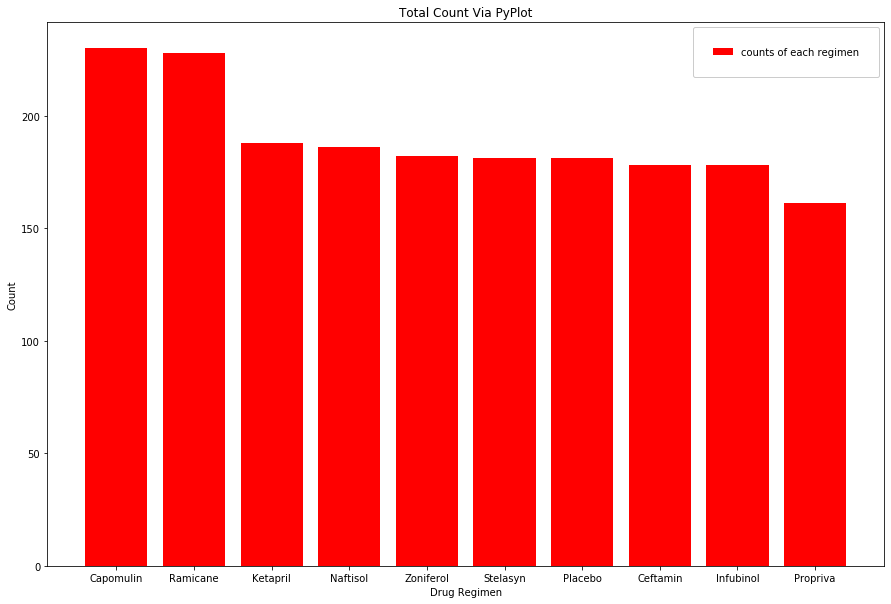

In [5]:

#x_axis = np.arange(len(combined_mouse_df['Drug Regimen']))
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, rotation=45)
#plt.hist(combined_mouse_df['Drug Regimen'].value_counts())



#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])


# Set x axis and tick locations
#x_axis = np.arange(len(summary_table3))
#tick_locations = [value for value in x_axis]  

#tick_locations
#plt.figure(figsize=(100,300))
#plt.bar(x_axis, combined_mouse_df['Drug Regimen'].value_counts(), color='r', alpha=0.5, align="edge")
#plt.xticks(tick_locations , combined_mouse_df['Drug Regimen'] ,rotation="vertical")

#plt.title("Average Rain per State")
#plt.xlabel("State")
#plt.ylabel("Average Amount of Rainfall in Inches")  
#plt.tight_layout()
#plt.show()

# Set x and y limits
#plt.xlim(-0.25, len(x_axis))
#plt.ylim(0, max(rain_df["Inches"])+10)

#plt.xticks(combined_mouse_df.groupby('Drug Regimen').value_counts())


drug_regimen =summary_table3.index.tolist()


num_regimen = combined_mouse_df['Drug Regimen'].value_counts()

x_axis = np.arange(len(num_regimen))
x_axis=drug_regimen
Gender = ['counts of each regimen']

plt.figure(figsize =(15,10))
plt.bar(x_axis, num_regimen, color='r', align='center')
plt.legend(Gender, loc="best",fancybox=True, framealpha=1, borderpad=2, ncol=2)
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Total Count Via PyPlot")

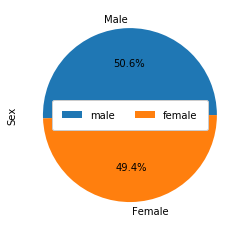

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


counts = combined_mouse_df.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
Gender4 = ['male', 'female']
plt.legend(Gender4, loc="center",fancybox=True, framealpha=1, borderpad=1, ncol=2)
# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

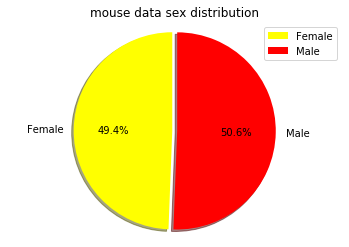

In [7]:
#generate pie plot using pyplot, matplotlib

gyms = ["Female", "Male"]
members = [935,958]
colors = ["yellow", "red"]
explode = (0, 0.05)


plt.title("mouse data sex distribution")
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

plt.legend(gyms, loc="best")
plt.axis("equal")
plt.show()

#combined_mouse_df.plot(kind="pie", y = combined_mouse_df.Sex.value_counts(), title=("mouse data sex distribution"))


In [8]:
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = combined_mouse_df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(combined_mouse_df,on=['Mouse ID','Timepoint'],how="left")
newdata = merged_data.groupby('Drug Regimen')

In [9]:
#Quantitatively determine ramicane outliers

ramicane = newdata.get_group('Ramicane')['Tumor Volume (mm3)']
 
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq- ram_lowerq

print(f"The lower quartile of ramicane mouse , tumor volume is: {ram_lowerq}")
print(f"The upper quartile of ramicane mouse , tumor volume is: {ram_upperq}")
print(f"The interquartile range of ramicane mouse ,  is: {ram_iqr}")


ram_lower_bound = ram_lowerq - (1.5*ram_iqr)

ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

#outlier_occupancy = merged_data.loc[(ramicane['Tumor Volume (mm3)'] < lower_bound) | (ramicane['Tumor Volume (mm3)']  > upper_bound)]
#outlier_occupancy

The lower quartile of ramicane mouse , tumor volume is: 31.56046955
The upper quartile of ramicane mouse , tumor volume is: 40.65900627
The interquartile range of ramicane mouse ,  is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


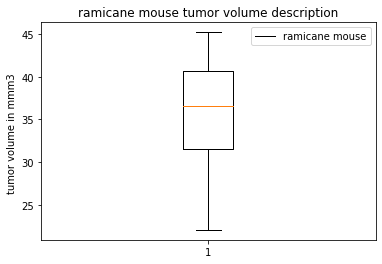

In [10]:
fig2, ax2 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax2.set_title('Notched boxes')
ax2.boxplot(ramicane,  flierprops=green_diamond)
ax2.set_title('ramicane mouse tumor volume description')
ax2.set_ylabel('tumor volume in mmm3 ')

ax2.legend(['ramicane mouse'])

In [11]:
Capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
 
capomulin_quartiles = Capomulin.quantile([.25,.5,.75])
lowerq1 = capomulin_quartiles[0.25]
upperq1 = capomulin_quartiles[0.75]
iqr1 = upperq1-lowerq1

print(f"The lower quartile of capomulin mouse , tumor volume is: {lowerq1}")
print(f"The upper quartile of capomulin mouse , tumor volume is: {upperq1}")
print(f"The interquartile range of capomulin mouse ,  is: {iqr1}")


lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")


print(f"Capomulin potential outliers: {Capomulin.loc[(Capomulin < lower_bound1) | (Capomulin > upper_bound1)]}")

The lower quartile of capomulin mouse , tumor volume is: 32.37735684
The upper quartile of capomulin mouse , tumor volume is: 40.1592203
The interquartile range of capomulin mouse ,  is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


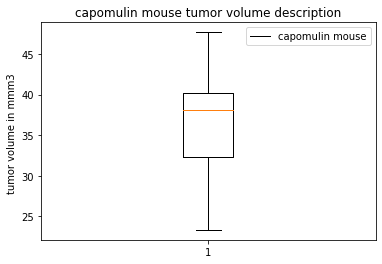

In [12]:
fig3, ax3 = plt.subplots()
green_diamond = dict(markerfacecolor='r', marker='D')
ax3.set_title('Notched boxes')
ax3.boxplot(Capomulin,  flierprops=green_diamond)
ax3.set_title('capomulin mouse tumor volume description')
ax3.set_ylabel('tumor volume in mmm3 ')
ax3.legend(['capomulin mouse'])

In [13]:
Infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
 
Infubinol_quartiles = Infubinol.quantile([.25,.5,.75])
lowerq3 = Infubinol_quartiles[0.25]
upperq3 = Infubinol_quartiles[0.75]
iqr3 = upperq3-lowerq3

print(f"The lower quartile of Infubinol mouse , tumor volume is: {lowerq3}")
print(f"The upper quartile of Infubinol mouse , tumor volume is: {upperq3}")
print(f"The interquartile range of Infubinol mouse ,  is: {iqr3}")


lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")


print(f"Infubinol potential outliers: {Infubinol.loc[(Infubinol < lower_bound3) | (Infubinol > upper_bound3)]}")

The lower quartile of Infubinol mouse , tumor volume is: 54.04860769
The upper quartile of Infubinol mouse , tumor volume is: 65.52574285
The interquartile range of Infubinol mouse ,  is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


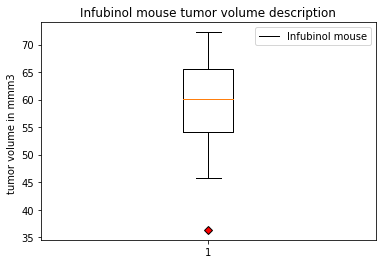

In [14]:
fig4, ax4 = plt.subplots()
green_diamond = dict(markerfacecolor='r', marker='D')
ax4.set_title('Notched boxes')
ax4.boxplot(Infubinol,  flierprops=green_diamond)
ax4.set_title('Infubinol mouse tumor volume description')
ax4.set_ylabel('tumor volume in mmm3 ')
ax4.legend(['Infubinol mouse'])

In [15]:
Ceftamin =  merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']
 
Ceftamin_quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq4 = Ceftamin_quartiles[0.25]
upperq4 = Ceftamin_quartiles[0.75]
iqr4 = upperq4-lowerq4

print(f"The lower quartile of Ceftamin mouse , tumor volume is: {lowerq4}")
print(f"The upper quartile of Ceftamin mouse , tumor volume is: {upperq4}")
print(f"The interquartile range of Ceftamin mouse ,  is: {iqr4}")


lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Values below {lower_bound4} could be outliers.")
print(f"Values above {upper_bound4} could be outliers.")


print(f"ceftamin potential outliers: {Ceftamin.loc[(Ceftamin < lower_bound4) | (Ceftamin > upper_bound4)]}")

The lower quartile of Ceftamin mouse , tumor volume is: 48.72207785
The upper quartile of Ceftamin mouse , tumor volume is: 64.29983003
The interquartile range of Ceftamin mouse ,  is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


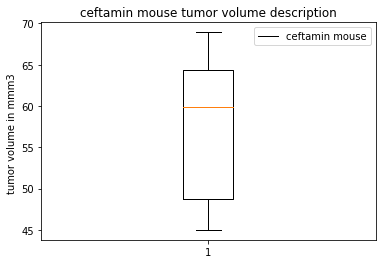

In [16]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig5, ax5 = plt.subplots()
ax5.set_title('ceftamin mouse tumor volume description')
ax5.set_ylabel('tumor volume in mmm3 ')
ax5.boxplot(Ceftamin, flierprops=green_diamond)
ax5.legend(['ceftamin mouse'])

In [17]:
#Capomulin.


id1= combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "s185" ]['Tumor Volume (mm3)']
id2 = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "s185" ]['Timepoint']
#id3 = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin"]['Mouse ID']


summary_table = pd.DataFrame({"tumor volume": id1, "timepoint": id2})
summary_table



,tumor volume,timepoint
10,45.000000,0
11,43.878496,5
12,37.614948,10
13,38.177232,15
14,36.866876,20
15,33.949940,25
16,32.959671,30
17,28.328531,35
18,25.472143,40
19,23.343598,45


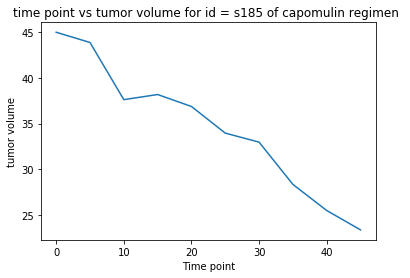

In [18]:
plt.xlabel("Time point")
plt.ylabel("tumor volume")

plt.title("time point vs tumor volume for id = s185 of capomulin regimen ")
# Have to plot our line chart of time point vs tumor volume for  capomulin , mouse id = r517
plt.plot(id2,id1)
plt.show() 

In [19]:
#id3 = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin" ]['Tumor Volume (mm3)']
#id4 = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin" ]['Weight (g)']
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_table =  combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin" ]
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()


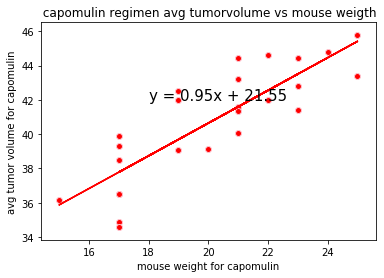

The correlation between both factors is 0.84


In [20]:
#generate regress and correlation coffient 


x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,42),fontsize=15,color="black")

plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="pink")
plt.title(" capomulin regimen avg tumorvolume vs mouse weigth")
plt.xlabel("mouse weight for capomulin")
plt.ylabel("avg tumor volume for capomulin")
#plt.legend("capomulins",loc="best",fancybox=True, framealpha=1, borderpad=2, ncol=2)
plt.show()


correlation = st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")



